In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.utils.extmath import randomized_svd

In [10]:
df = pd.read_csv('../data/lem_stem_text.csv')
df

,folder,extension,filename,absolute_path,size_mb,created_on,last_modified_on,unix_permission,raw_text,lemmatized_text,stemmed_text
0,../data/t5/,.text,000083.text,../data/t5/000083.text,0.007671,2011-02-08 15:37:52,2011-02-08 15:37:52,-rw-r--r--,PUBLIC NOTICE\n FEDERAL COMMUNICATIONS COMMISS...,public news medium information fax on demand i...,public news medium inform fax on demand intern...
1,../data/t5/,.text,000086.text,../data/t5/000086.text,0.026270,2011-02-08 15:37:52,2011-02-08 15:37:52,-rw-r--r--,"Time,F-Scale,Location,County,State,Lat,Lon,Com...",tornado TOUCHDOWN along the line near TOUCHDOW...,tornado touchdown along the line near touchdow...
2,../data/t5/,.text,000087.text,../data/t5/000087.text,0.023494,2011-02-08 15:37:52,2011-02-08 15:37:52,-rw-r--r--,**********************************************...,this document be convert from to format conten...,this document be convert from to format conten...
3,../data/t5/,.text,000088.text,../data/t5/000088.text,0.004139,2011-02-08 15:37:52,2011-02-08 15:37:52,-rw-r--r--,76 APPENDIX.\n able...,able timber land be tributary to the town by w...,abl timber land be tributari to the town by wa...
4,../data/t5/,.text,000089.text,../data/t5/000089.text,0.036176,2011-02-08 15:37:52,2011-02-08 15:37:52,-rw-r--r--,WASHINGTON CONGRESSIONAL DISTRICTS BY SCHOOL D...,congressional district by school district note...,congression district by school district note i...
...,...,...,...,...,...,...,...,...,...,...,...
3244,../data/t5/,.pdf,004995.pdf,../data/t5/004995.pdf,1.447938,2011-02-08 15:54:18,2011-02-08 15:54:18,-rw-r--r--,PROGRESS IN DEVELOPMENT OF LOW-ENRICHED\nU-MO ...,progress in development of low enrich dispersi...,progress in develop of low enrich dispers fuel...
3245,../data/t5/,.pdf,004996.pdf,../data/t5/004996.pdf,0.134183,2011-02-08 15:54:18,2011-02-08 15:54:18,-rw-r--r--,Growth of giant magnetoresistance spin valves ...,growth of giant magnetoresistance spin valve u...,growth of giant magnetoresist spin valv use an...
3246,../data/t5/,.pdf,004997.pdf,../data/t5/004997.pdf,1.522431,2011-02-08 15:54:18,2011-02-08 15:54:18,-rw-r--r--,IRRADIATION TESTS OF 99Mo\nISOTOPE PRODUCTION\...,irradiation test of isotope production employ ...,irradi test of isotop product employ uranium m...
3247,../data/t5/,.pdf,004998.pdf,../data/t5/004998.pdf,0.246117,2011-02-08 15:54:18,2011-02-08 15:54:18,-rw-r--r--,Chapter 4.\n\nBasic Failure Modes and Mechanis...,chapter and failure of electronic device in ge...,chapter and failur of electron devic in genera...


In [18]:
df[df['stemmed_text'].isna()]

,folder,extension,filename,absolute_path,size_mb,created_on,last_modified_on,unix_permission,raw_text,lemmatized_text,stemmed_text


In [19]:
params = {
    'vectorizer': {
        'analyzer': 'word',
        'stop_words': stopwords.words('english'),
        'ngram_range': (1, 1),
        'token_pattern': '[a-z]{3,}',
        'min_df': 0.01,
        'lowercase': True
    },
    'raw_documents': df['stemmed_text'],
    'components': 4,
}

# CountVectorizer

In [20]:
cv = CountVectorizer(**params['vectorizer'])
X_cv = cv.fit_transform(raw_documents=params['raw_documents'])

cv_doc_word = pd.DataFrame(X_cv.toarray(), columns=cv.get_feature_names())
cv_doc_word

,abandon,abat,abbrevi,abil,abl,abnorm,aboard,abroad,abrupt,absenc,...,yes,yesterday,yet,yield,young,youth,zero,zinc,zip,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,4
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,2
3226,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,0
3228,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Matrix Decomposition

In [21]:
k = 80
U, Sigma, VT = randomized_svd(X_cv, 
                              n_components=k,
                              n_iter=5,
                              random_state=None)

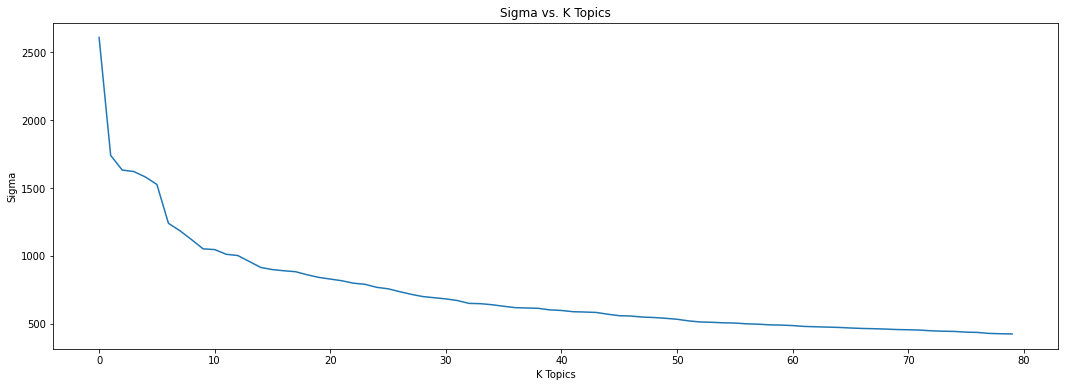

In [22]:
plt.figure(figsize=(18, 6))
plt.title("Sigma vs. K Topics")
plt.ylabel("Sigma")
plt.xlabel("K Topics")
sns.lineplot(range(k), Sigma)
plt.savefig("sigma_topics_cv.png");

In [23]:
list(zip(Sigma, range(80)))[:15]

[(2609.550991408828, 0),
 (1740.29248112974, 1),
 (1632.2186299271325, 2),
 (1621.131805485984, 3),
 (1581.2263575846068, 4),
 (1525.911968650883, 5),
 (1239.3804170152264, 6),
 (1184.4371384683946, 7),
 (1119.247331112835, 8),
 (1051.0861994947757, 9),
 (1045.7146364856428, 10),
 (1011.1280824145932, 11),
 (1001.8346994123459, 12),
 (957.7432897531148, 13),
 (913.723109160867, 14)]

# TF-IDF

In [24]:
tfidf = TfidfVectorizer(**params['vectorizer'])
X_tfidf = tfidf.fit_transform(raw_documents=params['raw_documents'])

tfidf_doc_word = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names())
tfidf_doc_word

,abandon,abat,abbrevi,abil,abl,abnorm,aboard,abroad,abrupt,absenc,...,yes,yesterday,yet,yield,young,youth,zero,zinc,zip,zone
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.033489
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.009869,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.012723,0.000000,0.0,0.0,0.0,0.000000,0.0,0.028454
3,0.0,0.0,0.0,0.0,0.03206,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.041317,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.017197,...,0.0,0.0,0.000000,0.008726,0.0,0.0,0.0,0.000000,0.0,0.016501
3226,0.0,0.0,0.0,0.0,0.00345,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
3227,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.007351,0.0,0.0,0.0,0.023376,0.0,0.000000
3228,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.003862,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


### Matrix Decomposition

In [25]:
k = 80
U, Sigma, VT = randomized_svd(X_tfidf, 
                              n_components=k,
                              n_iter=5,
                              random_state=None)

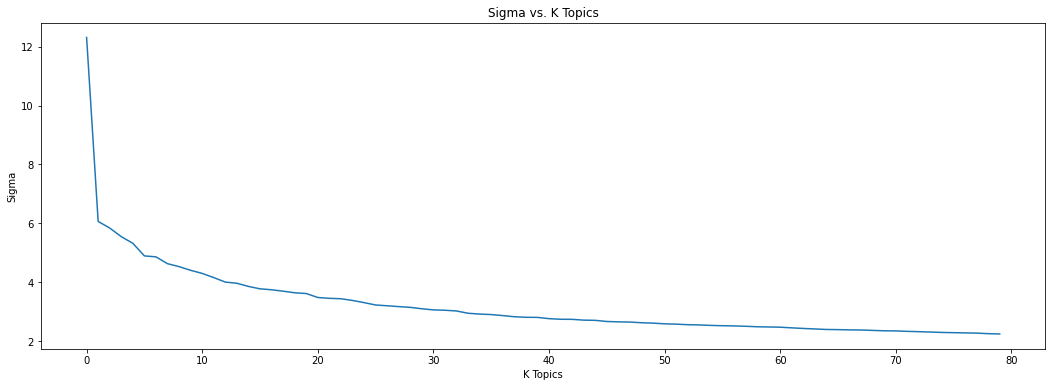

In [26]:
plt.figure(figsize=(18, 6))
plt.title("Sigma vs. K Topics")
plt.ylabel("Sigma")
plt.xlabel("K Topics")
sns.lineplot(range(k), Sigma)
plt.savefig("sigma_topics_tfidf.png");

In [27]:
pair_sig_topic = list(zip(Sigma, range(k)))
for i in range(k):
    print(pair_sig_topic[i][0])
    if str(pair_sig_topic[i][0])[:3] == str(pair_sig_topic[i + 1][0])[:3]:#(pair_sig_topic[i][0] / pair_sig_topic[i + 1][0]) == 1.0:
        print(pair_sig_topic[i][0], pair_sig_topic[i + 1][0])
        print(pair_sig_topic[i][1], pair_sig_topic[i + 1][1])
        print(pair_sig_topic[i + 2])
        print(str(pair_sig_topic[i + 2][0])[:3])
        break

12.311937485274429
6.060611705234865
5.836554675839171
5.543622889893752
5.318320076216516
4.890107635115971
4.890107635115971 4.85744951258855
5 6
(4.62602896597367, 7)
4.6


# Non-Negative Matrix (NMF)

In [28]:
# Use NMF to look for 15 topics
n_topics = 15
model = NMF(n_components=n_topics)
model.fit(X_tfidf)

# Print the top 10 words
n_words = 10
feature_names = tfidf.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: child student patient school studi medic languag educ develop care
Topic 1: magnet beam corrector model use measur system temperatur test energi
Topic 2: font color decor text famili size none weight background bold
Topic 3: por con del que est una persona son sin vez
Topic 4: generic drug brand product prescript prefer patent name medic agent
Topic 5: court appeal claim defend petition case district trial motion attorney
Topic 6: water speci plant area habitat soil fish beach site veget
Topic 7: file datum use name inform date line number com metadata
Topic 8: say get year work peopl would time make like come
Topic 9: site displac offset atmospher email load solid alon coordin accord
Topic 10: link function document var search els gene protein return url
Topic 11: imag src new image gif button earth mission stereo menu
Topic 12: shall section dwell requir person use build properti habit amend
Topic 13: locat scan nomin floor zone unit rate hear seri data
Topic 14: program ser

# Looking for best parameters with GridSearchCV

In [29]:
%%time

# Beware it will try *all* of the combinations, so it'll take ages
search_params = {
  'n_components': [5, 10, 15, 20, 25, 30, 40, 50],
  'learning_decay': [.2, .5, .7]
}

# Set up LDA with the options we'll keep static
model = LatentDirichletAllocation(learning_method='online')

# Try all of the options
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=1)
gridsearch.fit(X_tfidf)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)
lda_params = gridsearch.best_params_.copy()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.3min finished


Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -50317.9587655829
CPU times: user 13.8 s, sys: 233 ms, total: 14 s
Wall time: 9min 30s


In [30]:
%%time

# Use LDA to look for 5 topics
learning_decay, n_topics = lda_params.values()
model = LatentDirichletAllocation(learning_method='online', n_components=n_topics, learning_decay=learning_decay)
model.fit(X_tfidf)

# Print the top 10 words per topic
n_words = 10
feature_names = tfidf.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: use inform provid year program cost requir includ state may
Topic 1: por con del que est les una com persona des
Topic 2: coastlin helicopt reloc altitud hinder nitrat ment anomal pore pile
Topic 3: coastlin helicopt reloc altitud hinder nitrat ment anomal pore pile
Topic 4: water use temperatur speci coat surfac sampl diffus measur layer
CPU times: user 13.8 s, sys: 78.2 ms, total: 13.9 s
Wall time: 14.1 s


In [31]:
# Convert our counts into numbers
amounts = model.transform(X_tfidf) * 100

# Set it up as a dataframe
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head()

,topic_use_inform_provid,topic_por_con_del,topic_coastlin_helicopt_reloc,topic_coastlin_helicopt_reloc,topic_water_use_temperatur
0,91.795110,2.016574,2.016637,2.016637,2.155042
1,29.824268,2.888037,2.739027,2.739027,61.809641
2,92.099815,1.944037,1.944447,1.944447,2.067253
3,47.534239,1.842925,1.781368,1.781368,47.060100
4,81.745309,4.548232,4.549633,4.549633,4.607193


In [32]:
label = df['stemmed_text'].index
doc_topic = pd.DataFrame(model.fit_transform(tfidf.fit_transform(df['stemmed_text'])).round(5),
                         index = label,
                         columns=['topic{}'.format(i + 1) for i in range(n_topics)])

df['top_topic'] = doc_topic.idxmax(axis=1)

In [33]:
df[['top_topic', 'absolute_path']].groupby(by='top_topic').count()

,absolute_path
top_topic,
topic1,87
topic3,62
topic4,3081
